In [154]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
df = pd.read_excel('Data_Train.xlsx')

In [156]:
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [157]:
df[(df['Source'] == 'Banglore')&(df['Destination'] == 'New Delhi')]['Route'].unique()

array(['BLR → DEL', 'BLR → NAG → DEL', 'BLR → BOM → DEL',
       'BLR → COK → DEL', 'BLR → BOM → AMD → DEL', 'BLR → MAA → DEL',
       'BLR → HYD → DEL', 'BLR → BOM → JDH → DEL', 'BLR → CCU → DEL',
       'BLR → CCU → GAU → DEL', 'BLR → PNQ → DEL',
       'BLR → BOM → BHO → DEL', 'BLR → LKO → DEL', 'BLR → AMD → DEL',
       'BLR → VGA → DEL', 'BLR → BOM → IDR → DEL', 'BLR → BBI → DEL',
       'BLR → GOI → DEL', 'BLR → CCU → BBI → DEL',
       'BLR → BOM → NAG → DEL', 'BLR → CCU → BBI → HYD → DEL',
       'BLR → GAU → DEL', 'BLR → HYD → VGA → DEL',
       'BLR → VGA → HYD → DEL', 'BLR → BOM → IDR → GWL → DEL',
       'BLR → BDQ → DEL', 'BLR → TRV → COK → DEL', 'BLR → IDR → DEL',
       'BLR → BOM → UDR → DEL', 'BLR → VGA → VTZ → DEL',
       'BLR → HBX → BOM → BHO → DEL', 'BLR → HBX → BOM → AMD → DEL',
       'BLR → STV → DEL', 'BLR → HBX → BOM → NAG → DEL',
       'BLR → BOM → IXC → DEL', 'BLR → CCU → BBI → HYD → VGA → DEL'],
      dtype=object)

In [158]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

Price is our target variable

In [159]:
df.shape

(10683, 11)

In [160]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

#### dtypes is not to check whether it is categorical or numerical even , numerical type can also be object type thats why we describe to cross check

In [161]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [162]:
df.dropna(inplace = True)

In [163]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [164]:
df.shape

(10682, 11)

In [165]:
df[['Airline','Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info']].describe()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10682,10682,10682,10682,10682,10682,10682,10682,10682
unique,12,5,6,128,222,1343,368,5,10
top,Jet Airways,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,4536,4536,2376,233,423,550,5625,8344


#### Also used for initial EDA 5 point summary 
Describe also helps to identify whether column is categorical or not

Dataset contains no numerical columns all are categorical columns

In [166]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [167]:
for i in df.columns:
    print(df[i].unique())

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG → BLR' 'BLR → NAG → DEL' 'CCU → BLR' 'BLR → BOM → DEL'

#### Price of flight with business class has highest fare with limited bookings

In [168]:
df.Date_of_Journey = df.Date_of_Journey.str.split('/')
df.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10682, dtype: object

In [169]:
df['Date'] = df.Date_of_Journey.str[0]

In [170]:
df['month'] = df.Date_of_Journey.str[1]

In [171]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,month
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,04
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,04
10680,Jet Airways,"[27, 04, 2019]",Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,04
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,01,03


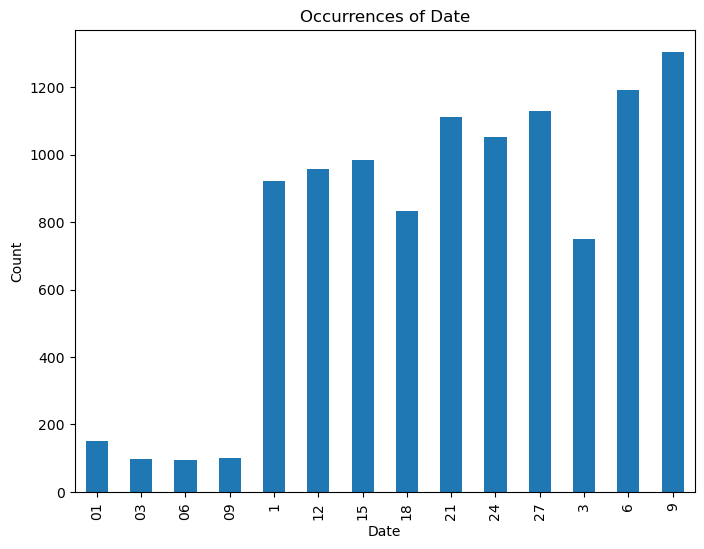

In [172]:
# Count the occurrences of each month
Date_counts = df['Date'].value_counts()

# Sort the months in chronological order
Date_counts = Date_counts.sort_index()

# Plot the count of occurrences
plt.figure(figsize=(8, 6))
Date_counts.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Occurrences of Date')
plt.show()

### Inference: Here in the above graph we have plotted the plot for journey in a Date vs several flights and got to see that day 09 of month has the most number of flights.

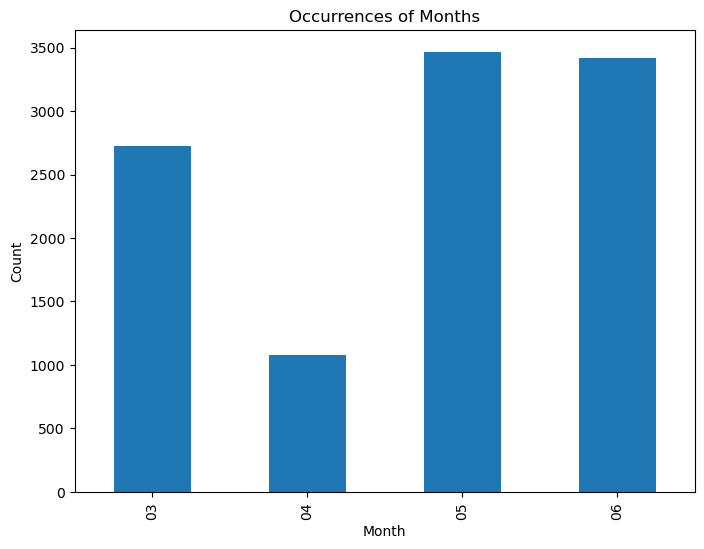

In [173]:
# Count the occurrences of each month
month_counts = df['month'].value_counts()

# Sort the months in chronological order
month_counts = month_counts.sort_index()

# Plot the count of occurrences
plt.figure(figsize=(8, 6))
month_counts.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Occurrences of Months')
plt.show()



### Inference: Here in the above graph we have plotted the plot for journey in a month vs several flights and got to see that May has the most number of flights.

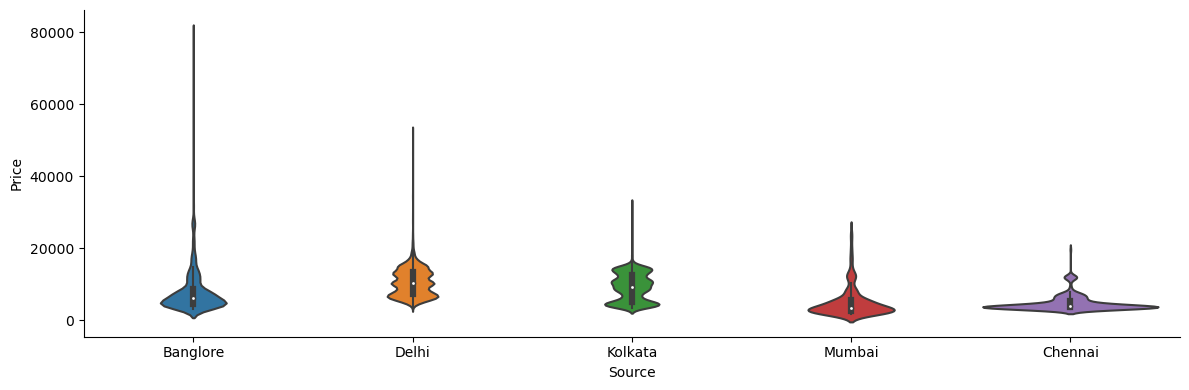

In [174]:
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

### Inference: Now with the help of cat plot only we are plotting a box plot between the price of the flight and the source place i.e. the place from where passengers will travel to the destination and we can see that Banglore as the source location has the most outliers while Chennai has the least.

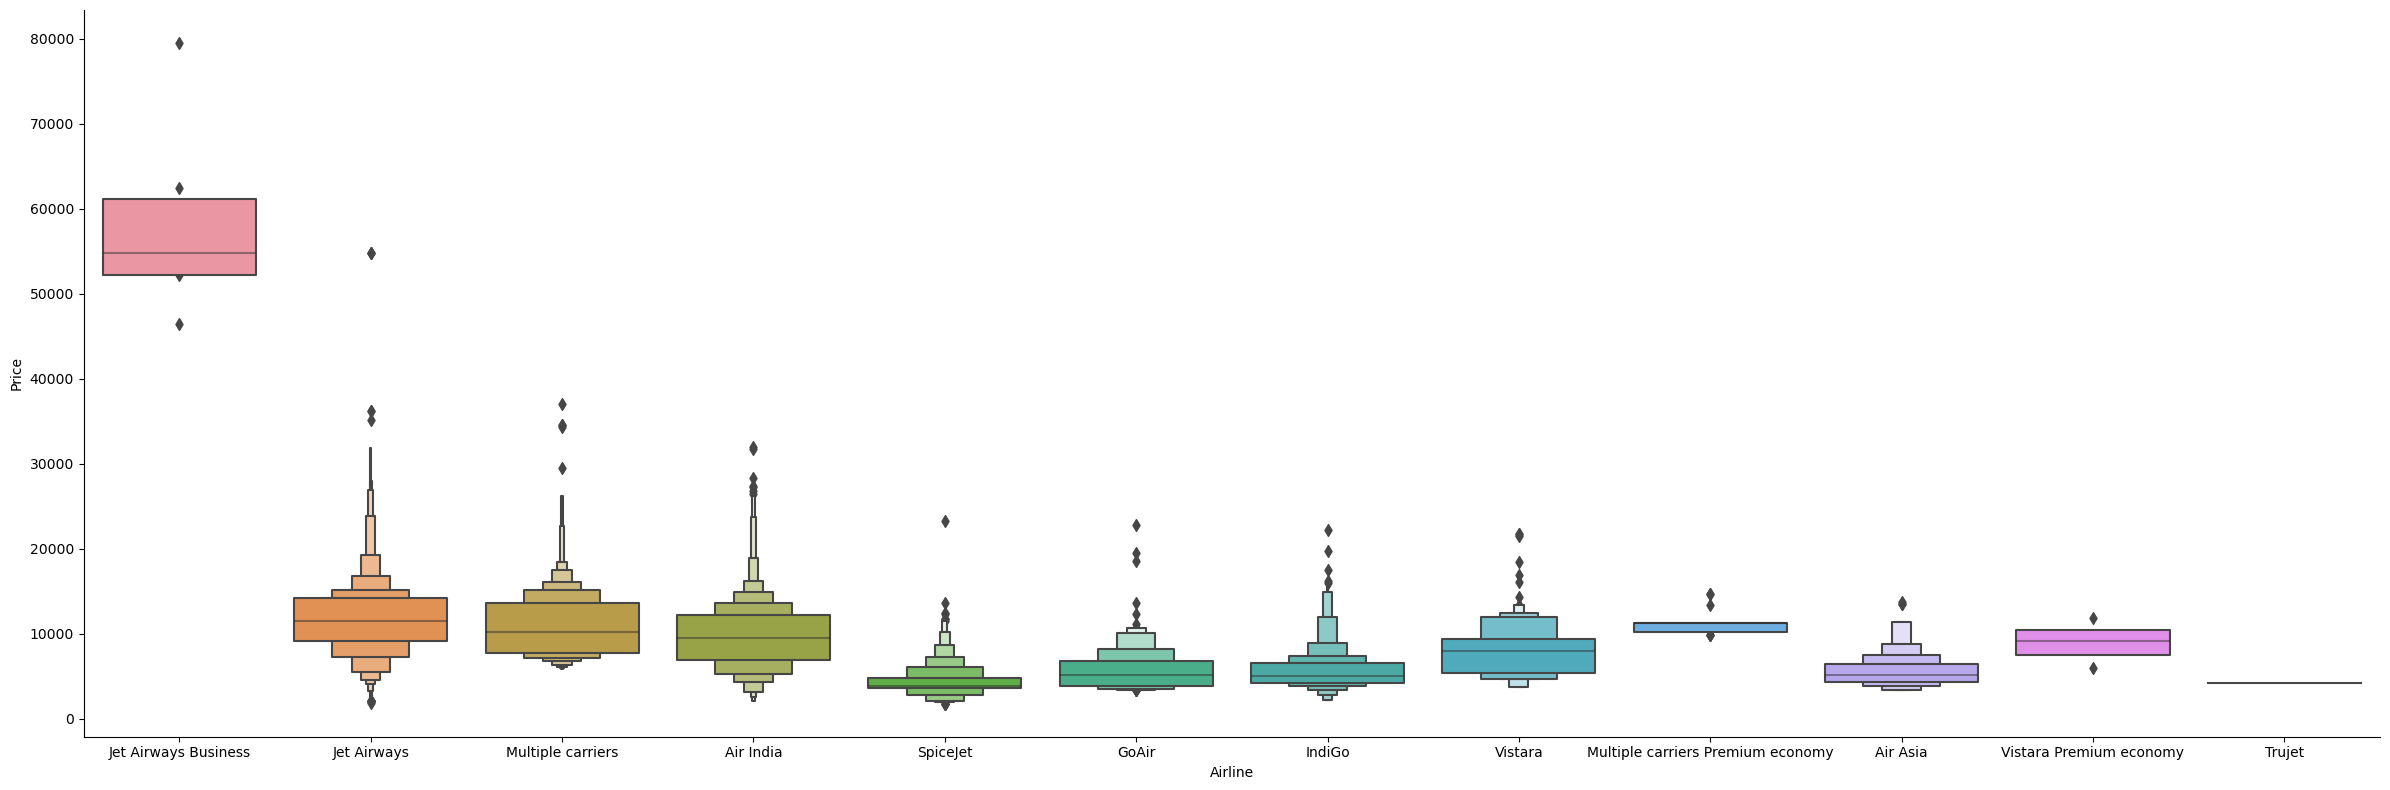

In [175]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

### Inference: Here with the help of the cat plot we are trying to plot the boxplot between the price of the flight and airline and we can conclude that Jet Airways has the most outliers in terms of price.

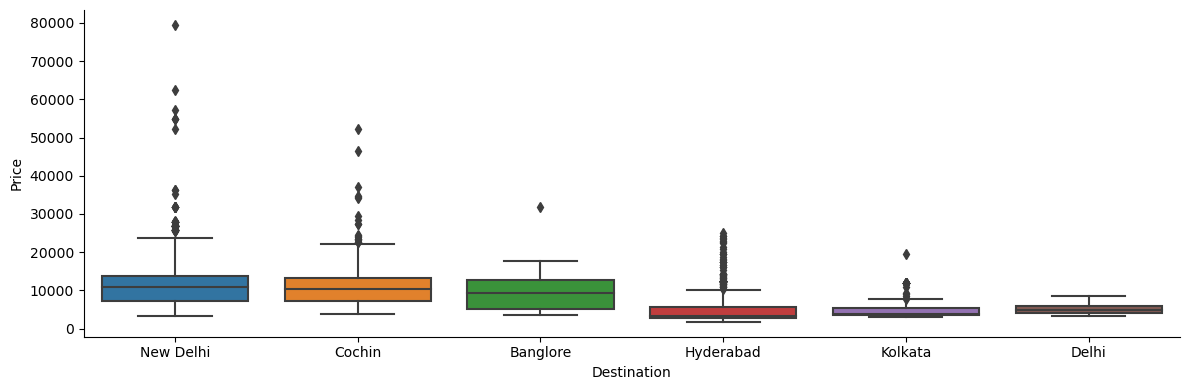

In [176]:
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

### Inference: Now with the help of cat plot only we are plotting a box plot between the price of the flight and the source place i.e. the place from where passengers will travel to the destination and we can see that Banglore as the source location has the most outliers while Chennai has the least.

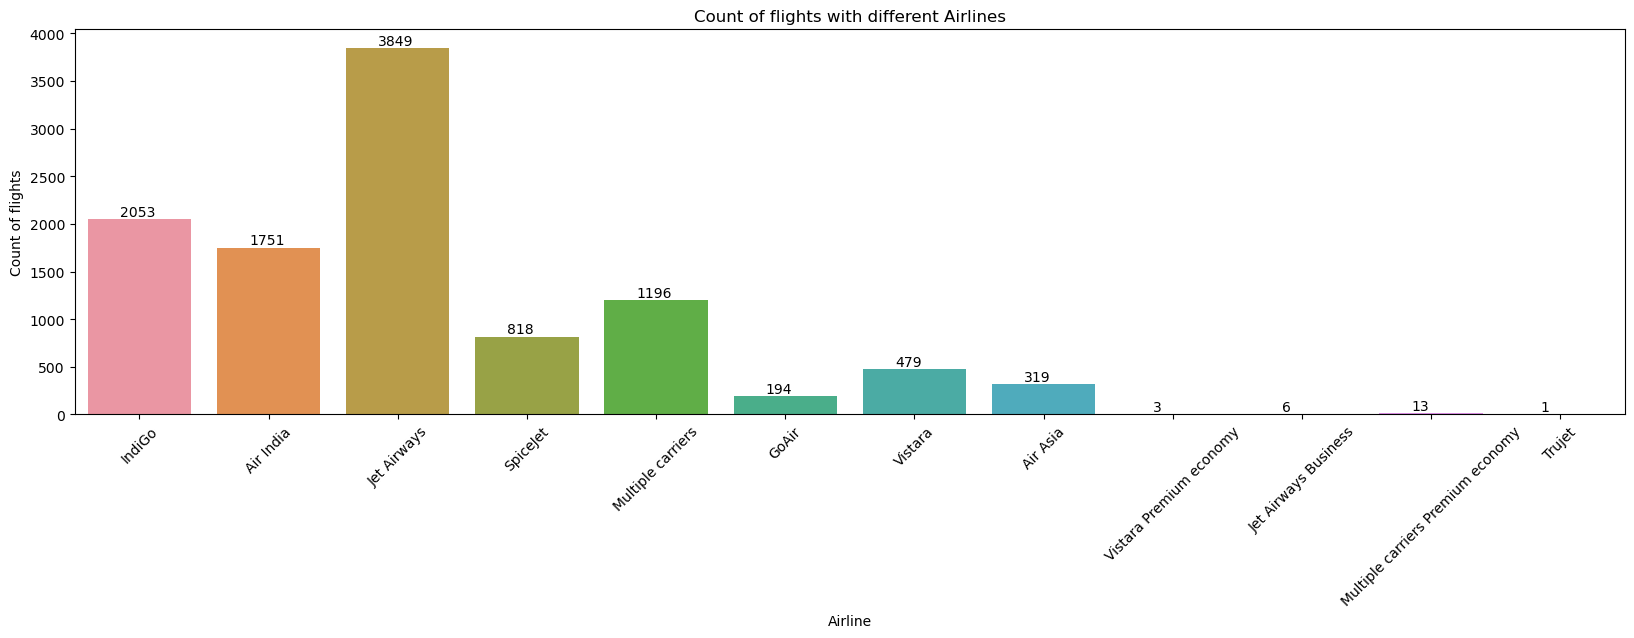

In [177]:
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')


### Inference : Jet airways are booked more often

In [178]:
#Now I want to remove column arrival because we already have duration problem but we need to prove it that column is of no use 
#steps
#we will take departure and arrival columns find their difference and equate it with duration 
#find correlation if correlation if high we can drop the column

# Convert Arrival time and Departure time to time format

# destination data contains both delhi and new delhi which is same
df['Destination'] = df['Destination'].replace('Delhi' , 'New Delhi')
df['Destination'].unique()
df



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,month
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,04
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,04
10680,Jet Airways,"[27, 04, 2019]",Banglore,New Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,04
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,01,03


In [179]:
# Converting departure time into category of 4 hours to check its relationship with Price (Target variable)
#using bins 
# Convert the 'Departure' column to datetime format
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M')
df
# Bin the 'Departure' column into 6 quantiles
df['Departure_Quantiles'] = pd.qcut(df['Dep_Time'].dt.hour, q=6, labels=['Q1', 'Q2', 'Q3', 'Q4','Q5','Q6']) #dividing 24/6 = 4 hours range
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,Departure_Quantiles
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,Q6
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,13:15,7h 25m,2 stops,No info,7662,1,05,Q1
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,04:25 10 Jun,19h,2 stops,No info,13882,9,06,Q2
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,23:30,5h 25m,1 stop,No info,6218,12,05,Q5
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,21:35,4h 45m,1 stop,No info,13302,01,03,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,CCU → BLR,1900-01-01 19:55:00,22:25,2h 30m,non-stop,No info,4107,9,04,Q5
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,CCU → BLR,1900-01-01 20:45:00,23:20,2h 35m,non-stop,No info,4145,27,04,Q6
10680,Jet Airways,"[27, 04, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 08:20:00,11:20,3h,non-stop,No info,7229,27,04,Q2
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 11:30:00,14:10,2h 40m,non-stop,No info,12648,01,03,Q3


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Departure_Quantiles', ylabel='count'>

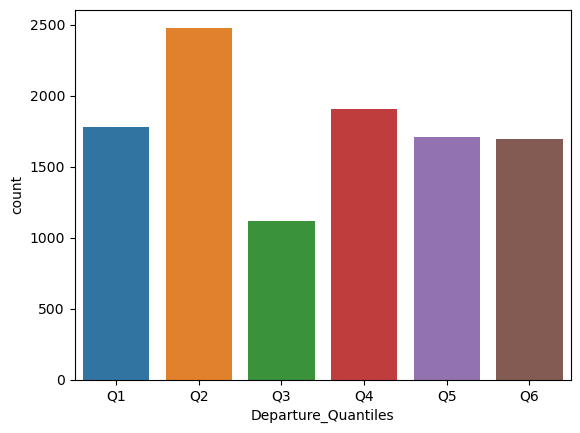

In [180]:
sns.countplot(df['Departure_Quantiles'])

### Q2 are booked more often compared to others

In [181]:
# convert arrival_time column to string type
df['Arrival_Time'] = df['Arrival_Time'].astype(str)
# extract time part from arrival_time column
df['Arrival_Time'] = df['Arrival_Time'].str.split(' ').str[0]
df
#pd.to_datetime function returns a NaT value (not a time). We have specified errors='coerce' argument to handle such errors and return NaT value.

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,Departure_Quantiles
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,01:10,2h 50m,non-stop,No info,3897,24,03,Q6
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,13:15,7h 25m,2 stops,No info,7662,1,05,Q1
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,04:25,19h,2 stops,No info,13882,9,06,Q2
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,23:30,5h 25m,1 stop,No info,6218,12,05,Q5
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,21:35,4h 45m,1 stop,No info,13302,01,03,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,CCU → BLR,1900-01-01 19:55:00,22:25,2h 30m,non-stop,No info,4107,9,04,Q5
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,CCU → BLR,1900-01-01 20:45:00,23:20,2h 35m,non-stop,No info,4145,27,04,Q6
10680,Jet Airways,"[27, 04, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 08:20:00,11:20,3h,non-stop,No info,7229,27,04,Q2
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 11:30:00,14:10,2h 40m,non-stop,No info,12648,01,03,Q3


In [182]:
# Convert the 'Arrival_Time' column to datetime format
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'], format='%H:%M')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,Departure_Quantiles
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,1900-01-01 01:10:00,2h 50m,non-stop,No info,3897,24,03,Q6
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,1900-01-01 13:15:00,7h 25m,2 stops,No info,7662,1,05,Q1
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,1900-01-01 04:25:00,19h,2 stops,No info,13882,9,06,Q2
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,1900-01-01 23:30:00,5h 25m,1 stop,No info,6218,12,05,Q5
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,1900-01-01 21:35:00,4h 45m,1 stop,No info,13302,01,03,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,CCU → BLR,1900-01-01 19:55:00,1900-01-01 22:25:00,2h 30m,non-stop,No info,4107,9,04,Q5
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,CCU → BLR,1900-01-01 20:45:00,1900-01-01 23:20:00,2h 35m,non-stop,No info,4145,27,04,Q6
10680,Jet Airways,"[27, 04, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 08:20:00,1900-01-01 11:20:00,3h,non-stop,No info,7229,27,04,Q2
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 11:30:00,1900-01-01 14:10:00,2h 40m,non-stop,No info,12648,01,03,Q3


In [183]:
# Calculate the difference between 'Arrival' and 'Departure' columns
df['Difference'] = df['Arrival_Time'] - df['Dep_Time']
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,Departure_Quantiles,Difference
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,1900-01-01 01:10:00,2h 50m,non-stop,No info,3897,24,03,Q6,-1 days +02:50:00
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,1900-01-01 13:15:00,7h 25m,2 stops,No info,7662,1,05,Q1,0 days 07:25:00
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,1900-01-01 04:25:00,19h,2 stops,No info,13882,9,06,Q2,-1 days +19:00:00
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,1900-01-01 23:30:00,5h 25m,1 stop,No info,6218,12,05,Q5,0 days 05:25:00
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,1900-01-01 21:35:00,4h 45m,1 stop,No info,13302,01,03,Q4,0 days 04:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,CCU → BLR,1900-01-01 19:55:00,1900-01-01 22:25:00,2h 30m,non-stop,No info,4107,9,04,Q5,0 days 02:30:00
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,CCU → BLR,1900-01-01 20:45:00,1900-01-01 23:20:00,2h 35m,non-stop,No info,4145,27,04,Q6,0 days 02:35:00
10680,Jet Airways,"[27, 04, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 08:20:00,1900-01-01 11:20:00,3h,non-stop,No info,7229,27,04,Q2,0 days 03:00:00
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 11:30:00,1900-01-01 14:10:00,2h 40m,non-stop,No info,12648,01,03,Q3,0 days 02:40:00


### As we can Difference column and Duration columns are Highly correlated means: <br>
#### Arrival time - depature time = Difference is equal to duration column.
we have proven it using data so now we have enough evidence using data to drop arrival column as it is of no use we have duration column to check relation with target variable

In [184]:
df.drop('Arrival_Time' , axis = 1, inplace = True)

In [185]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,Departure_Quantiles,Difference
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,2h 50m,non-stop,No info,3897,24,03,Q6,-1 days +02:50:00
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,7h 25m,2 stops,No info,7662,1,05,Q1,0 days 07:25:00
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,19h,2 stops,No info,13882,9,06,Q2,-1 days +19:00:00
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,5h 25m,1 stop,No info,6218,12,05,Q5,0 days 05:25:00
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,4h 45m,1 stop,No info,13302,01,03,Q4,0 days 04:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,CCU → BLR,1900-01-01 19:55:00,2h 30m,non-stop,No info,4107,9,04,Q5,0 days 02:30:00
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,CCU → BLR,1900-01-01 20:45:00,2h 35m,non-stop,No info,4145,27,04,Q6,0 days 02:35:00
10680,Jet Airways,"[27, 04, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 08:20:00,3h,non-stop,No info,7229,27,04,Q2,0 days 03:00:00
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 11:30:00,2h 40m,non-stop,No info,12648,01,03,Q3,0 days 02:40:00


In [186]:
# Convert "Duration" column to timedelta
df['Duration'] = pd.to_timedelta(df['Duration'])
# Create bins for the categories
bins = [pd.Timedelta(hours=0), pd.Timedelta(hours=3), pd.Timedelta(hours=6), pd.Timedelta(hours=12), pd.Timedelta(hours=24),pd.Timedelta(hours=30),pd.Timedelta(hours=35),pd.Timedelta(hours=60)]
# Create labels for the categories
labels = ['<3 hours', '3-6 hours', '6-12 hours', '12-24 hours','24-30 hours','30-35 hours','more than 35 hours']
# Use pd.cut() to categorize the "Duration" column
df['Duration Category'] = pd.cut(df['Duration'], bins=bins, labels=labels)

In [187]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,Departure_Quantiles,Difference,Duration Category
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,0 days 02:50:00,non-stop,No info,3897,24,03,Q6,-1 days +02:50:00,<3 hours
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,0 days 07:25:00,2 stops,No info,7662,1,05,Q1,0 days 07:25:00,6-12 hours
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,0 days 19:00:00,2 stops,No info,13882,9,06,Q2,-1 days +19:00:00,12-24 hours
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,0 days 05:25:00,1 stop,No info,6218,12,05,Q5,0 days 05:25:00,3-6 hours
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,0 days 04:45:00,1 stop,No info,13302,01,03,Q4,0 days 04:45:00,3-6 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,CCU → BLR,1900-01-01 19:55:00,0 days 02:30:00,non-stop,No info,4107,9,04,Q5,0 days 02:30:00,<3 hours
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,CCU → BLR,1900-01-01 20:45:00,0 days 02:35:00,non-stop,No info,4145,27,04,Q6,0 days 02:35:00,<3 hours
10680,Jet Airways,"[27, 04, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 08:20:00,0 days 03:00:00,non-stop,No info,7229,27,04,Q2,0 days 03:00:00,<3 hours
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 11:30:00,0 days 02:40:00,non-stop,No info,12648,01,03,Q3,0 days 02:40:00,<3 hours


#### We have got categories for Duration 

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


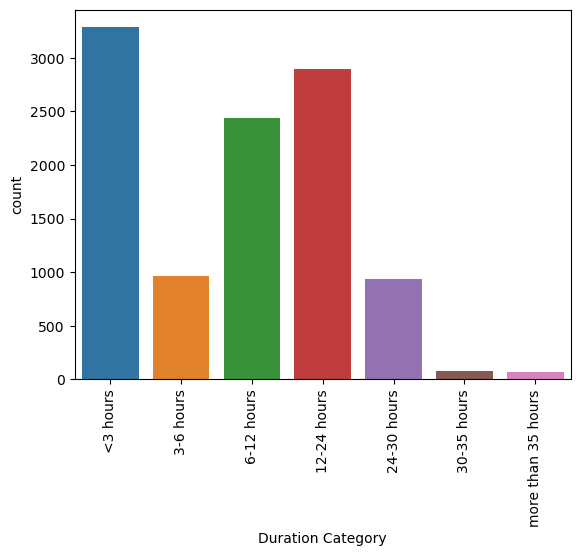

In [188]:
sns.countplot(df['Duration Category'])
plt.xticks(rotation = 90)
plt.show()

### Less than 3 Hours are booked more frequently

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

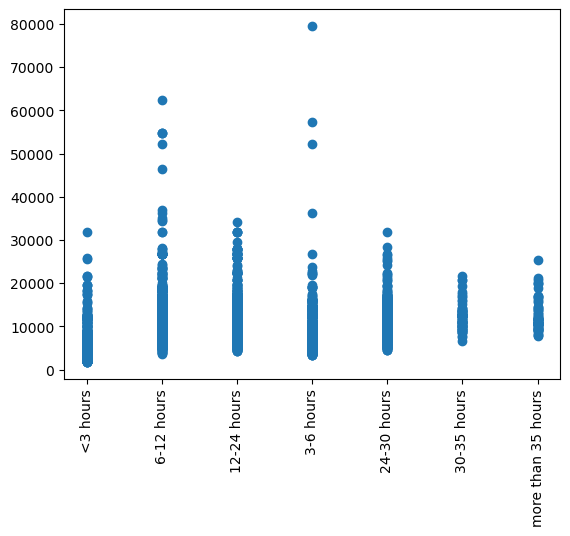

In [189]:
# create a line graph
plt.scatter(df['Duration Category'], df['Price'])
plt.xticks(rotation = 90)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

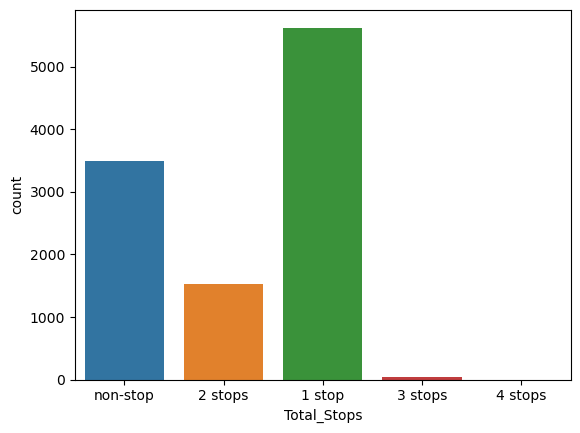

In [190]:
# create a bar graph
sns.countplot( df['Total_Stops'])


### Inference :  1 stop flights are booked more often compared to others

In [191]:
x_axis = df['Total_Stops'].unique()

In [192]:
x_axis

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [193]:
data1 = df[df['Total_Stops'] == 'non-stop']['Price']

In [194]:
data2 = df[df['Total_Stops'] == '1 stop']['Price']

In [195]:
data3 = df[df['Total_Stops'] == '2 stops']['Price']

In [196]:
data4 = df[df['Total_Stops'] == '3 stops']['Price']

In [197]:
data5 = df[df['Total_Stops'] == '4 stops']['Price']

In [198]:
data4.shape

(45,)

In [199]:
data = [data1, data2,data3, data4,data5]

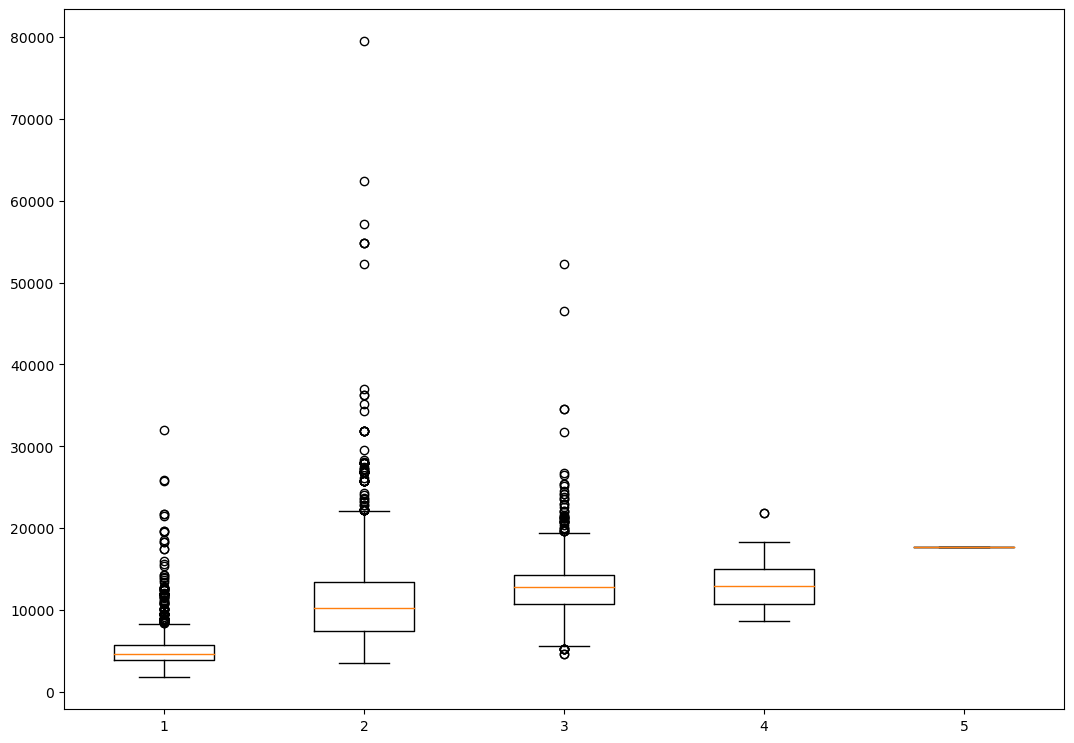

In [200]:
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

In [201]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,Departure_Quantiles,Difference,Duration Category
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,0 days 02:50:00,non-stop,No info,3897,24,03,Q6,-1 days +02:50:00,<3 hours
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,0 days 07:25:00,2 stops,No info,7662,1,05,Q1,0 days 07:25:00,6-12 hours
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,0 days 19:00:00,2 stops,No info,13882,9,06,Q2,-1 days +19:00:00,12-24 hours
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,0 days 05:25:00,1 stop,No info,6218,12,05,Q5,0 days 05:25:00,3-6 hours
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,0 days 04:45:00,1 stop,No info,13302,01,03,Q4,0 days 04:45:00,3-6 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,CCU → BLR,1900-01-01 19:55:00,0 days 02:30:00,non-stop,No info,4107,9,04,Q5,0 days 02:30:00,<3 hours
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,CCU → BLR,1900-01-01 20:45:00,0 days 02:35:00,non-stop,No info,4145,27,04,Q6,0 days 02:35:00,<3 hours
10680,Jet Airways,"[27, 04, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 08:20:00,0 days 03:00:00,non-stop,No info,7229,27,04,Q2,0 days 03:00:00,<3 hours
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,BLR → DEL,1900-01-01 11:30:00,0 days 02:40:00,non-stop,No info,12648,01,03,Q3,0 days 02:40:00,<3 hours


In [202]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

 ### Since the maximum number of stops is 4, there should be maximum 6 cities in any particular route. We split the data in route column, and store all the city names in separate columns

In [203]:
df.Route = df.Route.str.split('→')
df.Route

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10682, dtype: object

In [204]:
df['City1'] = df.Route.str[0]
df['City2'] = df.Route.str[1]
df['City3'] = df.Route.str[2]
df['City4'] = df.Route.str[3]
df['City5'] = df.Route.str[4]
df['City6'] = df.Route.str[5]

In [205]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,...,month,Departure_Quantiles,Difference,Duration Category,City1,City2,City3,City4,City5,City6
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]",1900-01-01 22:20:00,0 days 02:50:00,non-stop,No info,3897,...,03,Q6,-1 days +02:50:00,<3 hours,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",1900-01-01 05:50:00,0 days 07:25:00,2 stops,No info,7662,...,05,Q1,0 days 07:25:00,6-12 hours,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]",1900-01-01 09:25:00,0 days 19:00:00,2 stops,No info,13882,...,06,Q2,-1 days +19:00:00,12-24 hours,DEL,LKO,BOM,COK,NaN,NaN
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]",1900-01-01 18:05:00,0 days 05:25:00,1 stop,No info,6218,...,05,Q5,0 days 05:25:00,3-6 hours,CCU,NAG,BLR,NaN,NaN,NaN
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]",1900-01-01 16:50:00,0 days 04:45:00,1 stop,No info,13302,...,03,Q4,0 days 04:45:00,3-6 hours,BLR,NAG,DEL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]",1900-01-01 19:55:00,0 days 02:30:00,non-stop,No info,4107,...,04,Q5,0 days 02:30:00,<3 hours,CCU,BLR,NaN,NaN,NaN,NaN
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]",1900-01-01 20:45:00,0 days 02:35:00,non-stop,No info,4145,...,04,Q6,0 days 02:35:00,<3 hours,CCU,BLR,NaN,NaN,NaN,NaN
10680,Jet Airways,"[27, 04, 2019]",Banglore,New Delhi,"[BLR , DEL]",1900-01-01 08:20:00,0 days 03:00:00,non-stop,No info,7229,...,04,Q2,0 days 03:00:00,<3 hours,BLR,DEL,NaN,NaN,NaN,NaN
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]",1900-01-01 11:30:00,0 days 02:40:00,non-stop,No info,12648,...,03,Q3,0 days 02:40:00,<3 hours,BLR,DEL,NaN,NaN,NaN,NaN


In [206]:
df.isna().sum()

Airline                    0
Date_of_Journey            0
Source                     0
Destination                0
Route                      0
Dep_Time                   0
Duration                   0
Total_Stops                0
Additional_Info            0
Price                      0
Date                       0
month                      0
Departure_Quantiles        0
Difference                 0
Duration Category          0
City1                      0
City2                      0
City3                   3491
City4                   9116
City5                  10636
City6                  10681
dtype: int64

### We choose to drop ‘City4’ ,'City 5' , 'City 6 ', column, since 9117 values out of 10683 rows contain NaN values. 

In [207]:
df.drop(['City4' ,'City5','City6'] , axis=1 , inplace = True)

In [208]:
df.isna().sum()

Airline                   0
Date_of_Journey           0
Source                    0
Destination               0
Route                     0
Dep_Time                  0
Duration                  0
Total_Stops               0
Additional_Info           0
Price                     0
Date                      0
month                     0
Departure_Quantiles       0
Difference                0
Duration Category         0
City1                     0
City2                     0
City3                  3491
dtype: int64

In [209]:
df['City3'].fillna('None' , inplace = True)

#### We further replace 'NaN' values in City3 with 'None', since rows where City3 is missing did not have any stop, just the source and the destination

In [210]:
df.isna().sum()

Airline                0
Date_of_Journey        0
Source                 0
Destination            0
Route                  0
Dep_Time               0
Duration               0
Total_Stops            0
Additional_Info        0
Price                  0
Date                   0
month                  0
Departure_Quantiles    0
Difference             0
Duration Category      0
City1                  0
City2                  0
City3                  0
dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City1', ylabel='count'>

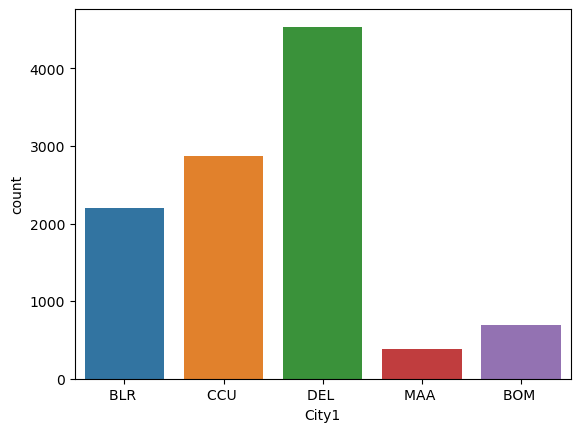

In [211]:
sns.countplot(df['City1'])

### City1

City1 has same data as source column


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


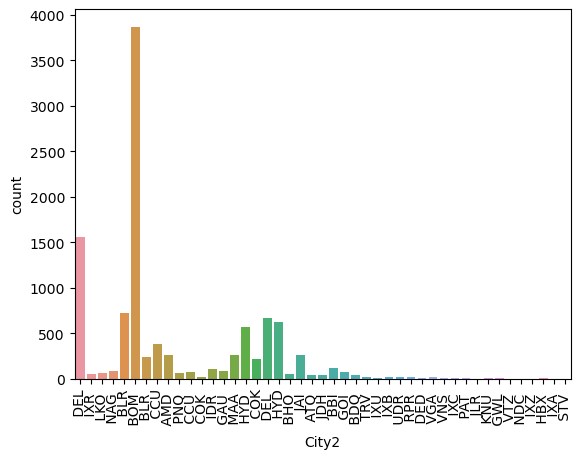

In [212]:
sns.countplot(df['City2'])
plt.xticks(rotation = 90)
plt.show()

### City2

Majority of the flights take a stop in Bombay.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


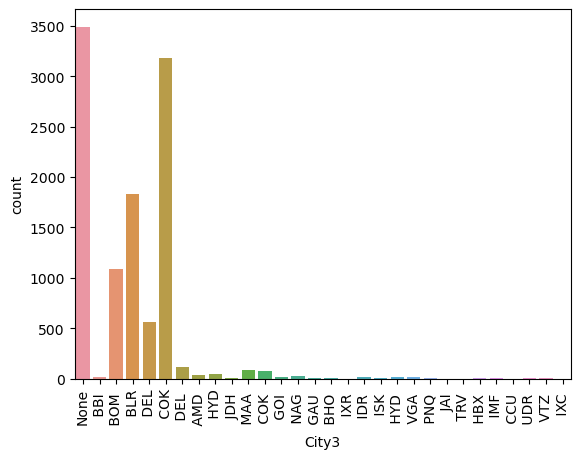

In [213]:
sns.countplot(df['City3'])
plt.xticks(rotation = 90)
plt.show()

### City3

Majority of the flights have no 2nd stop
If there is a second stop, chances are high of the place being Cochin.

In [214]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,Departure_Quantiles,Difference,Duration Category,City1,City2,City3
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]",1900-01-01 22:20:00,0 days 02:50:00,non-stop,No info,3897,24,03,Q6,-1 days +02:50:00,<3 hours,BLR,DEL,None
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",1900-01-01 05:50:00,0 days 07:25:00,2 stops,No info,7662,1,05,Q1,0 days 07:25:00,6-12 hours,CCU,IXR,BBI
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]",1900-01-01 09:25:00,0 days 19:00:00,2 stops,No info,13882,9,06,Q2,-1 days +19:00:00,12-24 hours,DEL,LKO,BOM
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]",1900-01-01 18:05:00,0 days 05:25:00,1 stop,No info,6218,12,05,Q5,0 days 05:25:00,3-6 hours,CCU,NAG,BLR
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]",1900-01-01 16:50:00,0 days 04:45:00,1 stop,No info,13302,01,03,Q4,0 days 04:45:00,3-6 hours,BLR,NAG,DEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]",1900-01-01 19:55:00,0 days 02:30:00,non-stop,No info,4107,9,04,Q5,0 days 02:30:00,<3 hours,CCU,BLR,None
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,"[CCU , BLR]",1900-01-01 20:45:00,0 days 02:35:00,non-stop,No info,4145,27,04,Q6,0 days 02:35:00,<3 hours,CCU,BLR,None
10680,Jet Airways,"[27, 04, 2019]",Banglore,New Delhi,"[BLR , DEL]",1900-01-01 08:20:00,0 days 03:00:00,non-stop,No info,7229,27,04,Q2,0 days 03:00:00,<3 hours,BLR,DEL,None
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]",1900-01-01 11:30:00,0 days 02:40:00,non-stop,No info,12648,01,03,Q3,0 days 02:40:00,<3 hours,BLR,DEL,None


In [215]:
df.drop(['Date_of_Journey' , 'Route' , 'Dep_Time' , 'Duration' , 'Difference'],axis = 1 , inplace = True)

In [216]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,month,Departure_Quantiles,Duration Category,City1,City2,City3
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,03,Q6,<3 hours,BLR,DEL,None
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,05,Q1,6-12 hours,CCU,IXR,BBI
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,06,Q2,12-24 hours,DEL,LKO,BOM
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,05,Q5,3-6 hours,CCU,NAG,BLR
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,01,03,Q4,3-6 hours,BLR,NAG,DEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,9,04,Q5,<3 hours,CCU,BLR,None
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,27,04,Q6,<3 hours,CCU,BLR,None
10680,Jet Airways,Banglore,New Delhi,non-stop,No info,7229,27,04,Q2,<3 hours,BLR,DEL,None
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,01,03,Q3,<3 hours,BLR,DEL,None


In [217]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Date', 'month', 'Departure_Quantiles', 'Duration Category',
       'City1', 'City2', 'City3'],
      dtype='object')

In [ ]:
categorical = df[['Airline','Source','Destination','Total_Stops','Additional_Info','Departure_Quantiles','Duration Category','City1','City2','City3']]
numerical = df[['Date','month']]

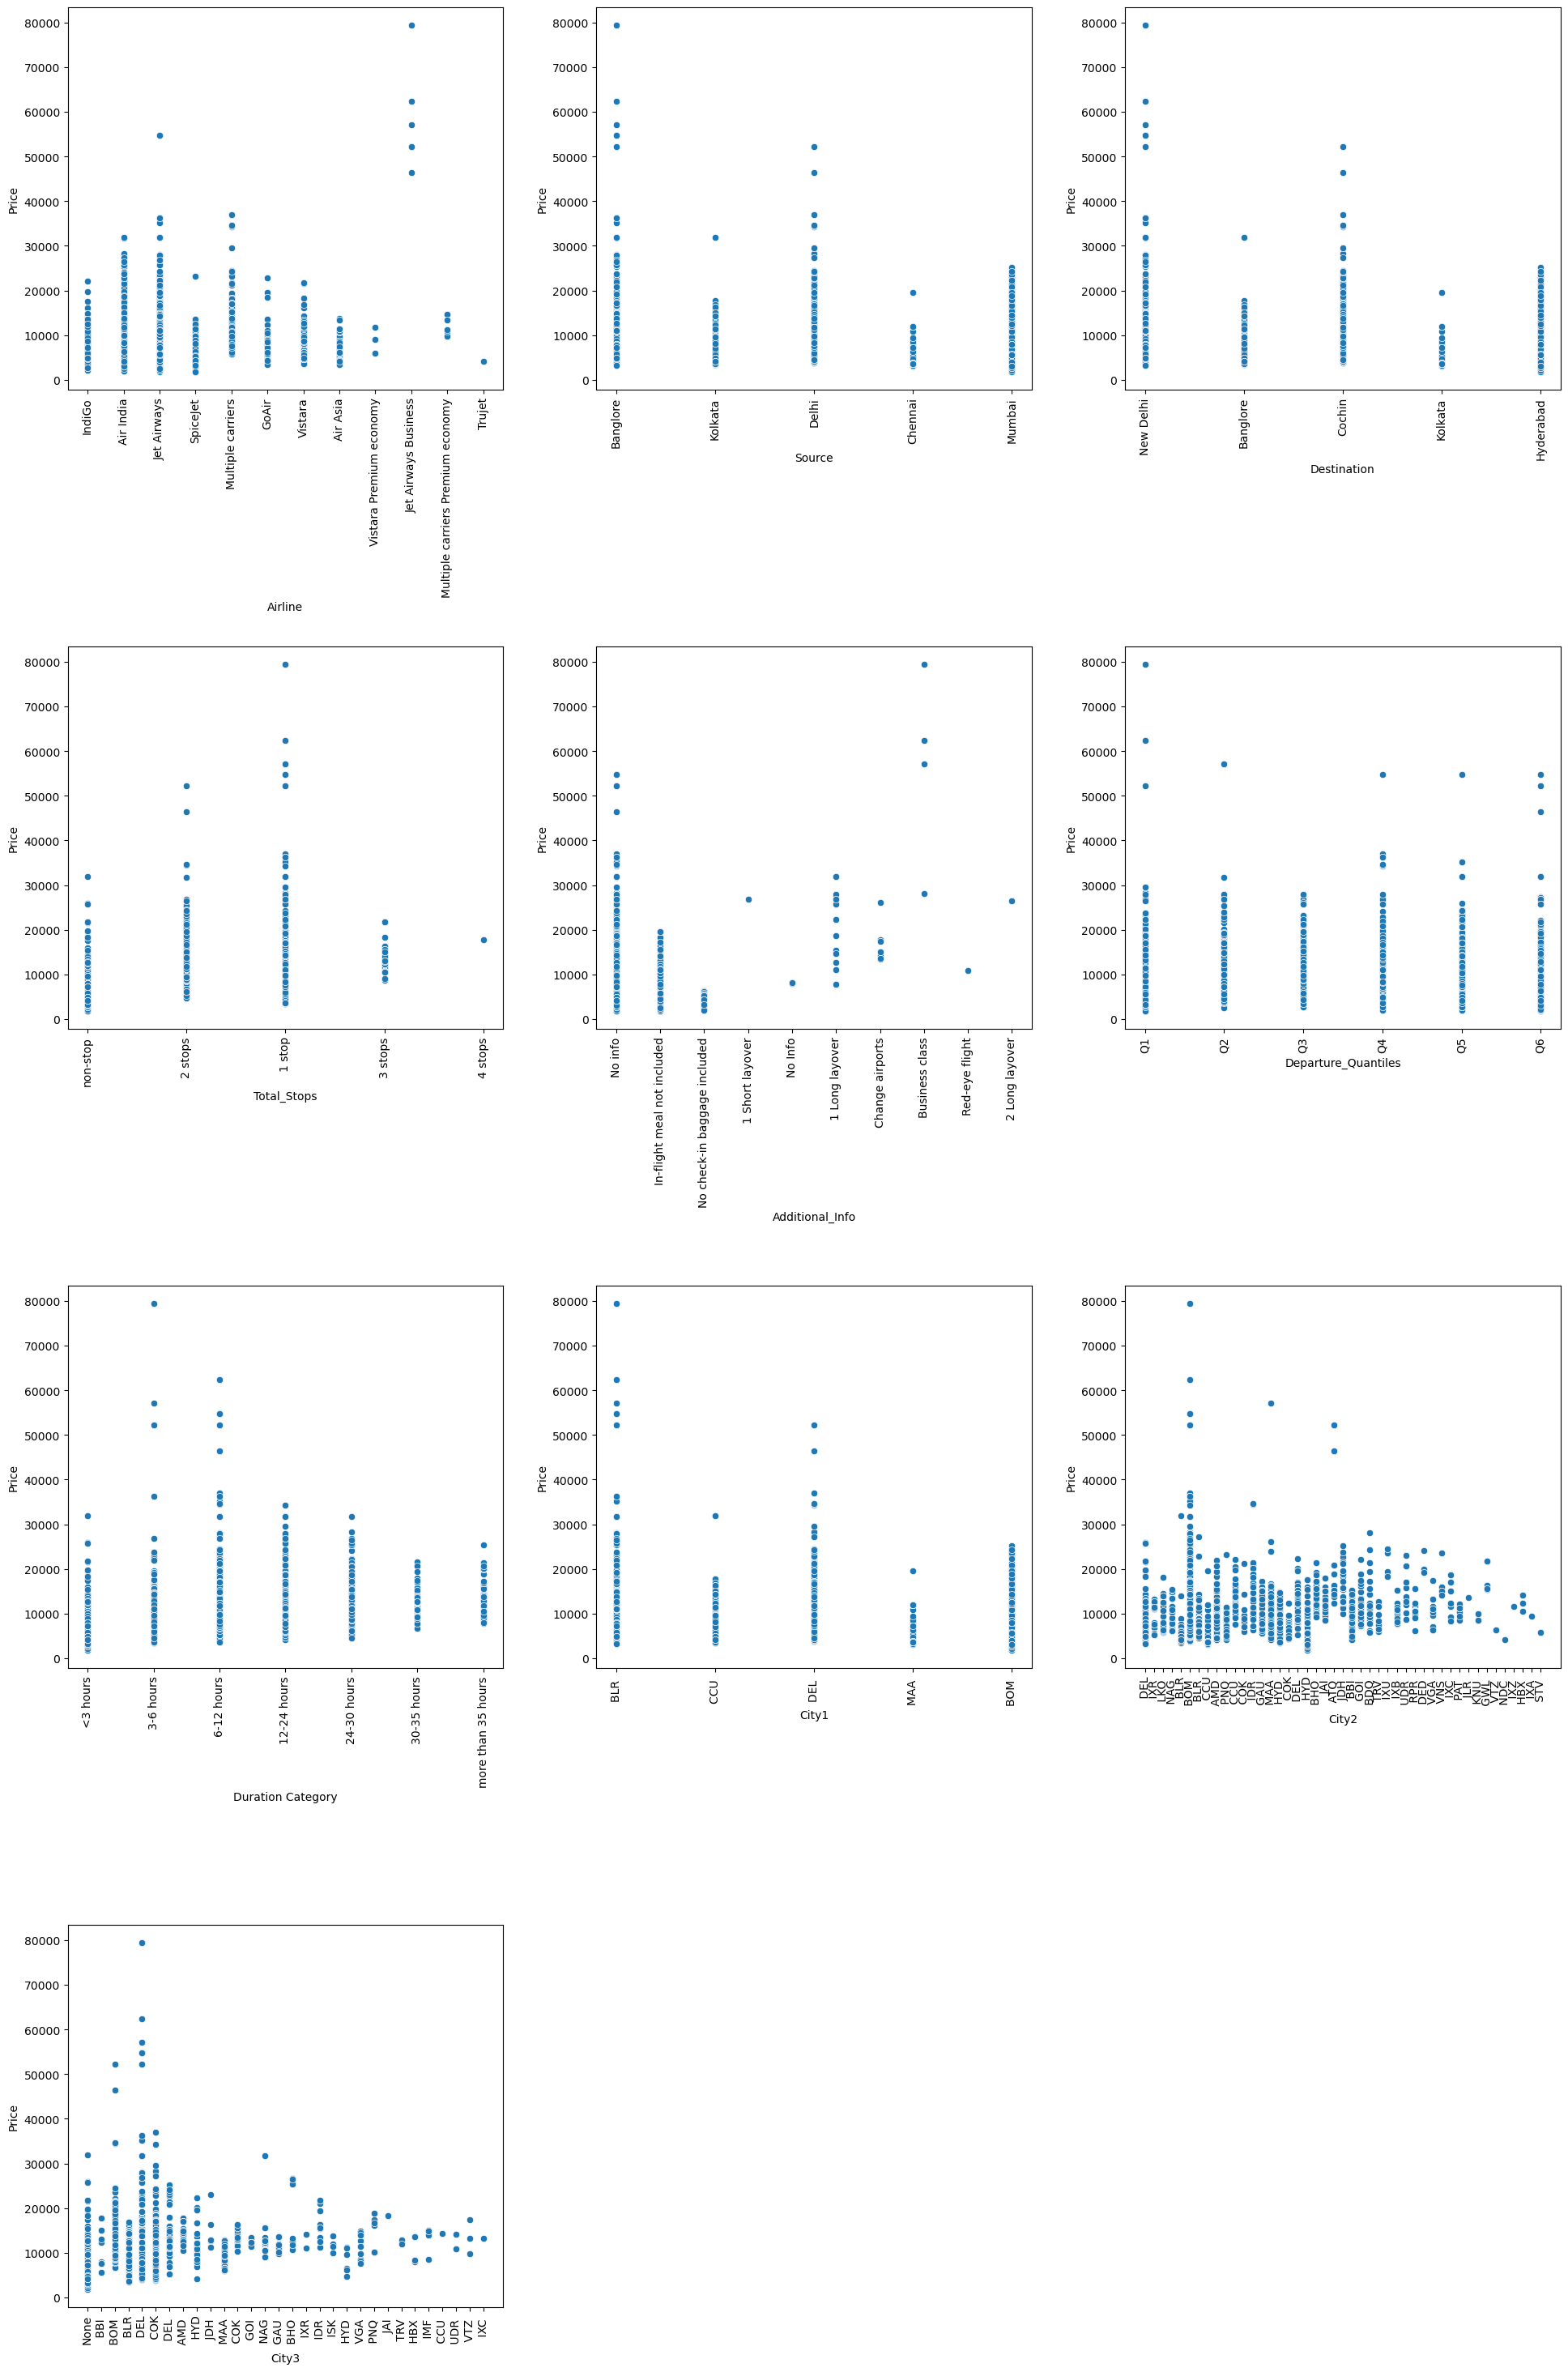

In [218]:
c=1
plt.figure(figsize=(20,45))
for i in categorical:
    plt.subplot(6,3,c)
    sns.scatterplot(x = df[i] , y = df.Price)
    plt.xticks(rotation = 90)
    plt.tight_layout(pad=3.0)
    c=c+1
plt.show()

### Inferences : 
Jet airways business class has the highest prices between 50k — 80k

All the high cost flights depart from bangalore, rest of the flights have prices between 3k — 50k

All high cost flights have destination as Delhi, rest of the flights have prices between 3k — 50k

If a flight is of business class, its price would be high

The flights with high prices having 1 stop, have stop in Bombay

Flights with 2 stops, having higher prices, have stop in Cochin.

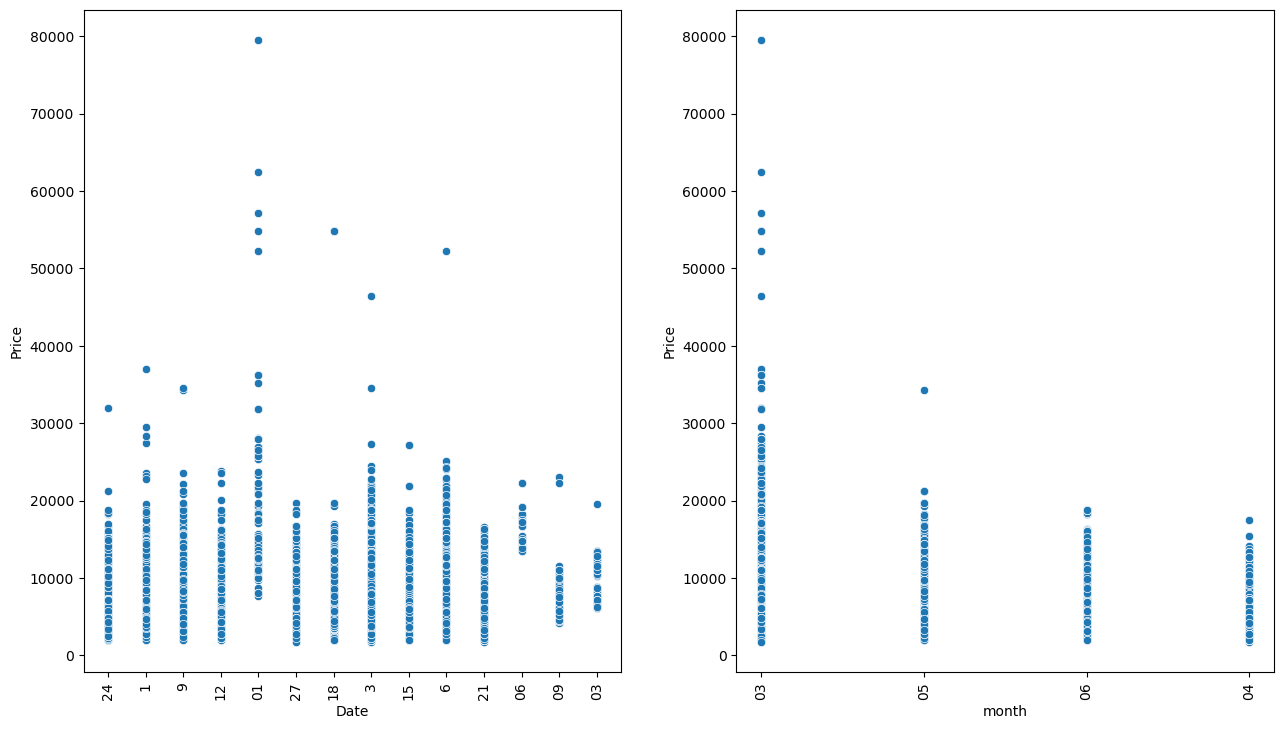

In [219]:
c=1
plt.figure(figsize=(20,45))
for i in numerical:
    plt.subplot(6,3,c)
    sns.scatterplot(x = df[i] , y = df.Price)
    plt.xticks(rotation = 90)
    plt.tight_layout(pad=3.0)
    c=c+1
plt.show()

### Inferences : 

High price flights are lesser during end of month.

Prices are higher in the month of March

## Encoding

In [220]:
df = pd.get_dummies(df, columns=['Airline' ,'Destination','Source','Total_Stops','Additional_Info','Departure_Quantiles'], drop_first=True)

In [221]:
df

,Price,Date,month,Duration Category,City1,City2,City3,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Departure_Quantiles_Q2,Departure_Quantiles_Q3,Departure_Quantiles_Q4,Departure_Quantiles_Q5,Departure_Quantiles_Q6
0,3897,24,03,<3 hours,BLR,DEL,None,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,7662,1,05,6-12 hours,CCU,IXR,BBI,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,13882,9,06,12-24 hours,DEL,LKO,BOM,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,6218,12,05,3-6 hours,CCU,NAG,BLR,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,13302,01,03,3-6 hours,BLR,NAG,DEL,0,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4107,9,04,<3 hours,CCU,BLR,None,0,0,0,...,0,0,0,1,0,0,0,0,1,0
10679,4145,27,04,<3 hours,CCU,BLR,None,1,0,0,...,0,0,0,1,0,0,0,0,0,1
10680,7229,27,04,<3 hours,BLR,DEL,None,0,0,0,...,0,0,0,1,0,1,0,0,0,0
10681,12648,01,03,<3 hours,BLR,DEL,None,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [222]:
df.columns

Index(['Price', 'Date', 'month', 'Duration Category', 'City1', 'City2',
       'City3', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Destination_Cochin', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Total_Stops_2 stops',
       'Total_Stops_3 stops', 'Total_Stops_4 stops', 'Total_Stops_non-stop',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No 

In [223]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Duration Category']= le.fit_transform(df['Duration Category'].values)
df['City1']= le.fit_transform(df['City1'].values)
df['City2']= le.fit_transform(df['City2'].values)
df['City3']= le.fit_transform(df['City3'].values)

In [224]:
df

,Price,Date,month,Duration Category,City1,City2,City3,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Departure_Quantiles_Q2,Departure_Quantiles_Q3,Departure_Quantiles_Q4,Departure_Quantiles_Q5,Departure_Quantiles_Q6
0,3897,24,03,5,0,13,29,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,7662,1,05,4,2,25,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,13882,9,06,0,3,32,4,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,6218,12,05,2,2,34,3,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,13302,01,03,2,0,34,8,0,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4107,9,04,5,2,5,29,0,0,0,...,0,0,0,1,0,0,0,0,1,0
10679,4145,27,04,5,2,5,29,1,0,0,...,0,0,0,1,0,0,0,0,0,1
10680,7229,27,04,5,0,13,29,0,0,0,...,0,0,0,1,0,1,0,0,0,0
10681,12648,01,03,5,0,13,29,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [225]:
df.columns

Index(['Price', 'Date', 'month', 'Duration Category', 'City1', 'City2',
       'City3', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Destination_Cochin', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Total_Stops_2 stops',
       'Total_Stops_3 stops', 'Total_Stops_4 stops', 'Total_Stops_non-stop',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No 

In [226]:
df.shape

(10682, 44)

### Scaling the Data
We use standard scaler for this process <br>

‘StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance’

In [227]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [228]:
ds_x = df.drop('Price' , axis =1)

In [229]:
dataset = sc.fit_transform(ds_x)

In [230]:
X = pd.DataFrame(dataset , columns = ds_x.columns)

## KNN regression

In [231]:
X

,Date,month,Duration Category,City1,City2,City3,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Departure_Quantiles_Q2,Departure_Quantiles_Q3,Departure_Quantiles_Q4,Departure_Quantiles_Q5,Departure_Quantiles_Q6
0,1.237288,-1.467402,1.061737,-1.674190,0.137651,1.395124,-0.442785,-0.136005,2.050151,-0.750530,...,-0.477301,-0.016761,-0.175733,0.52934,-0.009676,-0.549733,-0.341560,-0.466476,-0.435961,2.305856
1,-1.475307,0.250289,0.582567,-0.016066,1.636517,-1.082291,2.258432,-0.136005,-0.487769,-0.750530,...,-0.477301,-0.016761,-0.175733,0.52934,-0.009676,-0.549733,-0.341560,-0.466476,-0.435961,-0.433678
2,-0.531796,1.109135,-1.334113,0.812996,2.510856,-0.816854,-0.442785,-0.136005,-0.487769,1.332391,...,-0.477301,-0.016761,-0.175733,0.52934,-0.009676,1.819064,-0.341560,-0.466476,-0.435961,-0.433678
3,-0.177979,0.250289,-0.375773,-0.016066,2.760667,-0.905333,-0.442785,-0.136005,2.050151,-0.750530,...,-0.477301,-0.016761,-0.175733,0.52934,-0.009676,-0.549733,-0.341560,-0.466476,2.293781,-0.433678
4,-1.475307,-1.467402,-0.375773,-1.674190,2.760667,-0.462937,-0.442785,-0.136005,2.050151,-0.750530,...,-0.477301,-0.016761,-0.175733,0.52934,-0.009676,-0.549733,-0.341560,2.143735,-0.435961,-0.433678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,-0.531796,-0.608557,1.061737,-0.016066,-0.861593,1.395124,-0.442785,-0.136005,-0.487769,-0.750530,...,-0.477301,-0.016761,-0.175733,0.52934,-0.009676,-0.549733,-0.341560,-0.466476,2.293781,-0.433678
10678,1.591104,-0.608557,1.061737,-0.016066,-0.861593,1.395124,2.258432,-0.136005,-0.487769,-0.750530,...,-0.477301,-0.016761,-0.175733,0.52934,-0.009676,-0.549733,-0.341560,-0.466476,-0.435961,2.305856
10679,1.591104,-0.608557,1.061737,-1.674190,0.137651,1.395124,-0.442785,-0.136005,-0.487769,1.332391,...,-0.477301,-0.016761,-0.175733,0.52934,-0.009676,1.819064,-0.341560,-0.466476,-0.435961,-0.433678
10680,-1.475307,-1.467402,1.061737,-1.674190,0.137651,1.395124,-0.442785,-0.136005,-0.487769,-0.750530,...,-0.477301,-0.016761,-0.175733,0.52934,-0.009676,-0.549733,2.927744,-0.466476,-0.435961,-0.433678


In [232]:
y = df['Price']

In [233]:
from sklearn.model_selection import train_test_split

In [234]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3,random_state=42)

In [235]:
from sklearn.neighbors import KNeighborsRegressor
Knn_model = KNeighborsRegressor(n_neighbors= 15)
Knn_model.fit(X_train,y_train) #fitting the model using X_train and y_train learning of model

KNeighborsRegressor(n_neighbors=15)

In [236]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = Knn_model.predict(X_train) # predicting values using X_train
mse_knn = mean_squared_error(y_train, train_preds)# comparing above values with our actual values of y_train and finding error
print(mse_knn)
test_pred = Knn_model.predict(X_test)
mse_testknn = mean_squared_error(test_pred , y_test)
print(mse_testknn)

4986880.350799638
4559493.9556346


### KNN CV

In [237]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
# Create a KNN regressor
knn = KNeighborsRegressor(n_neighbors=10)

# Perform cross-validation
scores_train = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive and compute mean
mse_scores_train = -scores_train
mean_cv_train = np.mean(mse_scores_train)

# Print the mean squared error
print("Mean Squared Error:", mean_cv_train)

Mean Squared Error: 5710663.760674275


In [238]:
# Create a KNN regressor
knn = KNeighborsRegressor(n_neighbors=10)

# Perform cross-validation
scores_test = cross_val_score(knn, X_test, y_test, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive and compute mean
mse_scores_test = -scores_test
mean_test_cv = np.mean(mse_scores_test)

# Print the mean squared error
print("Mean Squared Error:", mean_test_cv)

Mean Squared Error: 6218188.034159126


## Linear Regression

In [254]:
from sklearn.linear_model import LinearRegression

In [255]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [256]:
lr_train = lr.predict(X_train)
lr_test = lr.predict(X_test)

In [257]:
mse_trainlr = mean_squared_error(y_train,lr_train)
print(mse_trainlr)
mse_testlr = mean_squared_error(y_test,lr_test)
print(mse_testlr)

6586228.212870725
6148430.729531382


In [258]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, lr_train)
r2_test = r2_score(y_test,lr_test)
print(r2_train)
print(r2_test)

0.6955419702284684
0.6986200256333874


## Decision Tree

In [239]:
from sklearn.tree import DecisionTreeRegressor 
Dt_model = DecisionTreeRegressor()
Dt_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [240]:
train_pred = Dt_model.predict(X_train)

In [241]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse_Dt = mean_squared_error(y_train,train_pred)
print(mse_Dt)

799396.3993935853


In [242]:
test_pred = Dt_model.predict(X_test)
mse_testdt = mean_squared_error(y_test,test_pred)
print(mse_testdt)

2888145.4728361536


### Important features

In [244]:
from sklearn.ensemble import ExtraTreesRegressor

In [245]:
selection = ExtraTreesRegressor()
selection.fit(X_train,y_train)

ExtraTreesRegressor()

In [246]:
print(selection.feature_importances_)

[9.48857518e-02 5.37383760e-02 1.79708743e-02 1.39343035e-02
 2.51509795e-02 2.12778255e-02 4.94575843e-03 1.66583549e-03
 3.51395982e-02 7.79853129e-02 7.25636847e-02 1.47287735e-02
 9.01906017e-04 7.51416228e-03 3.87788458e-04 2.81954503e-03
 2.35127983e-05 3.04551470e-03 3.96618563e-03 8.75780787e-04
 1.11105811e-02 7.23306913e-04 2.61317329e-03 4.30897925e-03
 3.36001814e-03 1.89675586e-02 2.84913751e-03 1.02207106e-05
 3.78319185e-01 1.85851520e-05 2.64340115e-04 1.50888772e-03
 1.55232608e-03 8.07032182e-02 6.08959207e-06 7.39017547e-05
 6.92029631e-03 2.35566071e-04 7.42739731e-03 5.87484886e-03
 7.32673786e-03 6.65957526e-03 5.64459965e-03]


<AxesSubplot:>

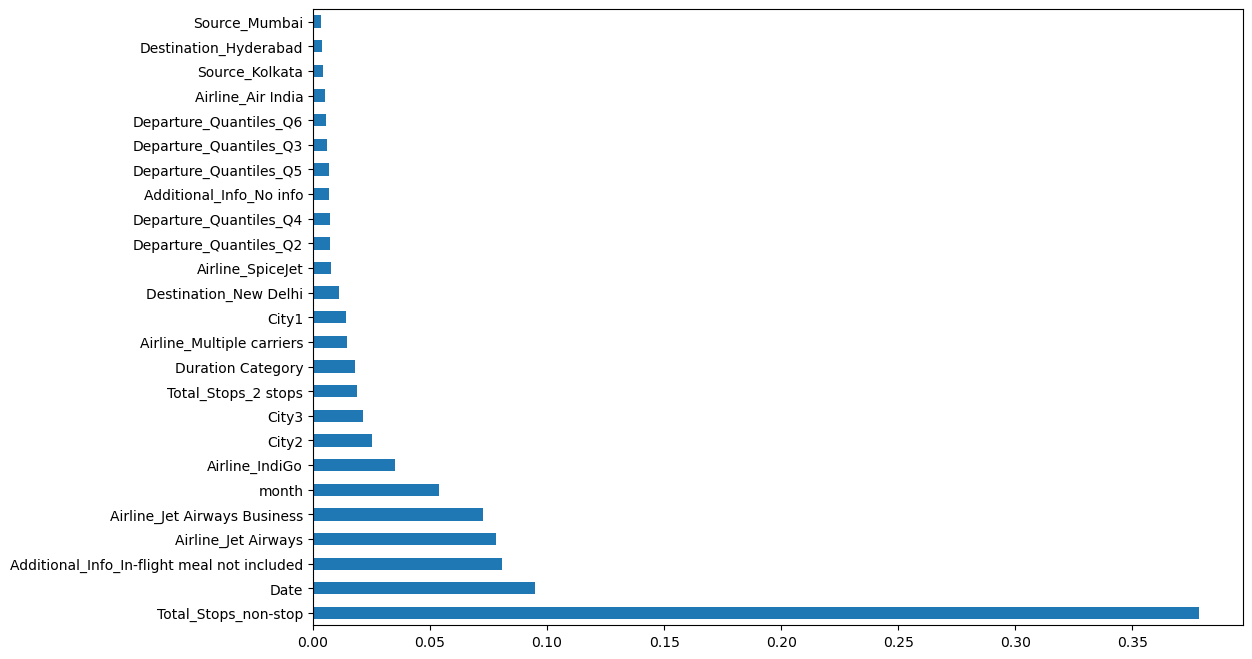

In [247]:
plt.figure(figsize = (12,8))
feature_importance = pd.Series(selection.feature_importances_,index=X_train.columns)
feature_importance.nlargest(25).plot(kind='barh')

In [260]:
# Get the coefficients
coefficients = lr.coef_

# Print the coefficients
print(coefficients)

[-5.26711853e+02 -5.53586423e+02  1.09302385e+02 -5.58933580e+01
 -4.18024700e+02  1.06165809e+02  7.68919943e+02  1.93064502e+00
  2.04311809e+02  2.95822962e+03  9.25658133e+02  1.14543999e+03
  1.18559865e+02  9.22297131e+01 -2.85411187e+01  4.62768967e+02
  5.77838937e+01 -7.63379239e-01 -1.03479732e+02  4.25252753e+01
  1.34057037e+02  4.25252753e+01 -7.63379239e-01 -8.15172887e+01
 -1.03479732e+02  7.91931655e+02  2.54974397e+02  1.45526716e+01
 -2.06342085e+03  5.13794128e+01  5.06336397e+01  2.87066805e+02
 -6.86863897e+01 -4.30862726e+03 -1.52140219e+02 -1.32198708e+03
 -3.06714105e+03 -2.25772899e+01  1.00596333e+02  7.36255151e+01
  1.67796543e+02 -8.13480923e+00  2.01925865e+02]


Summary Of Project : 
### 1.	Exploratory data analysis and Data preprocessing:<br>
•	Data types is not to check whether it is categorical or numerical.<br>
•	Price is our target variable <br>
•	(10683, 11) shape of our dataset<br>
•	 EDA 5 point summary descriptive analysis<br>
•	Data cleaning and Feature Engineering :
Separating date and month from date of journey column and creating new columns<br>
Transforming Departure column with time into 6 categories with interval of 4 hours<br>
Arrival columns data is very inconsistent performed hypotheses to drop as we already have duration column so validated if arrival – departure is equal to duration and checked correlation with arrival if highly correlated then preferred duration column as data is consistent<br>
Converted duration in categories to find inferences.<br>
Compared total stops and route column, as Max total stops are 4 so transformed route column into multiple city columns where each city column is representing each stop.<br>
Handling skewness and outliers - We use log transform method to remove skewness <br>
Handing missing values<br>
Using (matplotlib, seaborn) univariate and bivariate analysis found<br>
### 2.	Encoding the data — One Hot encoding, Label Encoding<br>
### 3. Scaling the data — Standard scaler <br>
### 4. Fitting the machine learning models<br>
K-Nearest Neighbors (KNN)<br>
	Train MSE: 4986880.350799638<br>
	Test MSE: 4559493.9556346<br>
KNN with Cross-Validation:<br>
	Train MSE: 5710663.760674275<br>
	Test MSE: 6218188.034159126<br>
Linear Regression:<br>
	Train MSE: 6586228.212870725<br>
	Test MSE: 6148430.729531382<br>
Decision Tree:<br>
	Train MSE: 799396.3993935853<br>
	Test MSE: 2888145.4728361536<br>
Conclusion: <br>
•	From the results, it appears that the Decision Tree model performs the best in terms of MSE on the training set, with a significantly lower MSE compared to the other models. However, it has a higher MSE on the testing set, indicating potential overfitting.<br>
•	The KNN model performs relatively well, with lower MSE values compared to the Linear Regression model. However, it shows some overfitting as well, as the training MSE is lower than the testing MSE.<br>
•	The Linear Regression model has higher MSE values compared to the other models, suggesting that it may not fit the data as well as the other models.<br>
### 5. Improving the performance selected model:<br>
•	Feature Engineering: Explore additional features or transform existing features to better capture the relationships in the data.<br>
•	Feature Selection: Identify and include only the most relevant features for modeling, removing any irrelevant or highly correlated variables.<br>
•	Regularization: Apply regularization techniques like L1 or L2 regularization in linear models to prevent overfitting.<br>
•	Hyperparameter Tuning: Experiment with different hyperparameters for each model to find the optimal configuration that minimizes the MSE on the testing set.<br>

### Inferences : <br>
•	Here in the above graph we have plotted the plot for journey in a Date vs several flights and got to see that day 09 of month has the most number of flights.<br>
•	Here in the above graph we have plotted the plot for journey in a month vs several flights and got to see that May has the most number of flights.<br>
•	Now with the help of cat plot only we are plotting a box plot between the price of the flight and the source place i.e. the place from where passengers will travel to the destination and we can see that Banglore as the source location has the most outliers while Chennai has the least.<br>
•	Here with the help of the cat plot we are trying to plot the boxplot between the price of the flight and airline and we can conclude that Jet Airways has the most outliers in terms of price<br>
•	Now with the help of cat plot only we are plotting a box plot between the price of the flight and the source place i.e. the place from where passengers will travel to the destination and we can see that Banglore as the source location has the most outliers while Chennai has the least.<br>
•	Jet airways are booked more often<br>
•	Less than 3 Hours are booked more frequently<br>
•	1 stop flights are booked more often compared to others<br>
•	Majority of the flights take a stop in Bombay.<br>
•	Majority of the flights have no 2nd stop If there is a second stop, chances are high of the place being Cochin.<br>
•	Jet airways business class has the highest prices between 50k — 80k<br>
•	All the high cost flights depart from bangalore, rest of the flights have prices between 3k — 50k<br>
•	All high cost flights have destination as Delhi, rest of the flights have prices between 3k — 50k<br>
•	If a flight is of business class, its price would be high<br>
•	The flights with high prices having 1 stop, have stop in Bombay<br>
•	Flights with 2 stops, having higher prices, have stop in Cochin.<br>
•	High price flights are lesser during end of month.<br>
•	Prices are higher in the month of March<br>
